<a href="https://colab.research.google.com/github/osirisberbesia/Laboratoria-Proyecto2-Hipotesis/blob/main/Laboratoria2_Hipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hipótesis
## Hito 2


In [ ]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import IPython

# Autenticar en Google Colab
auth.authenticate_user()

# Crear un cliente de BigQuery
client = bigquery.Client(project="laboratoria2")

# Consulta a BigQuery
query = f"""
SELECT * FROM `{"laboratoria2"}.{"datos_hipotesis"}.{"view_unificado"}`
"""

# Obtener todos los registros de la consulta y convertirlos en un DataFrame de Pandas
df = client.query(query).to_dataframe()

# Eliminar columnas que contienen 100% de valores NaN
df_cleaned = df.dropna(axis=1, how='all')

# Eliminar filas que contienen 100% de valores NaN
df_cleaned = df_cleaned.dropna(axis=0, how='all')

# Limpiar la salida de la ejecución anterior
IPython.display.clear_output()

# Mostrar el mensaje con la cantidad de datos y columnas
print(f"{len(df_cleaned)} datos traídos, con {df_cleaned.shape[1]} columnas")

# Mostrar todo el DataFrame de forma bonita y compacta
IPython.display.display(df_cleaned)

# Mostrar los encabezados del DataFrame
print("Encabezados del DataFrame:")
print(", ".join(df_cleaned.columns))



948 datos traídos, con 36 columnas


,track_id,track_name,artist_s_name,artist_count,categoria_artista,genero_artista,modo_cancion,released_date,in_spotify_playlists,in_spotify_charts,...,acousticness_%,cuartiles_acousticness,instrumentalness_%,cuartiles_instrumental,liveness_%,cuartiles_live,speechiness_%,cuartiles_speech,cuartiles_streams,cuartiles_categoria
0,2475712,Agudo Mgi,"Styrx, utku INC, Thezth",3,Estrella,Otros,Feat,1930-01-01,323,0,...,22,Bajo,4,Alto,7,Bajo,5,Bajo,4,Alto
1,6909746,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,Estrella,Otros,Feat,1942-01-01,11940,0,...,91,Alto,0,Bajo,40,Alto,3,Bajo,3,Medio-Alto
2,3087104,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1,Estrella,Otros,Solo,1946-11-01,11500,0,...,84,Alto,0,Bajo,11,Bajo,4,Bajo,3,Medio-Alto
3,8753775,Let It Snow Let It Snow Let It Snow,"Frank Sinatra, B Swanson Quartet",2,Estrella,Otros,Feat,1950-01-01,10585,0,...,88,Alto,0,Bajo,34,Alto,6,Bajo,3,Medio-Alto
4,4002890,A Holly Jolly Christmas - Single Version,Burl Ives,1,Estrella,Otros,Solo,1952-01-01,7930,0,...,64,Alto,0,Bajo,15,Bajo,3,Bajo,3,Medio-Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,4214662,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,Estrella,Otros,Feat,2023-07-13,437,31,...,5,Bajo,0,Alto,6,Bajo,5,Bajo,1,Bajo
944,1404326,What Was I Made For? From The Motion Picture B...,Billie Eilish,1,Superestrella,Pop,Solo,2023-07-13,873,104,...,96,Alto,0,Bajo,10,Bajo,3,Bajo,3,Medio-Alto
945,4082370,Seven (feat Latto) (Explicit Ver),"Latto, Jung Kook",2,Estrella,Otros,Feat,2023-07-14,553,147,...,31,Bajo,0,Bajo,8,Bajo,4,Bajo,1,Bajo
946,7624098,S91,Karol G,1,Estrella,Reggaeton,Solo,2023-07-14,525,41,...,59,Alto,0,Bajo,9,Bajo,19,Alto,1,Bajo


Encabezados del DataFrame:
track_id, track_name, artist_s_name, artist_count, categoria_artista, genero_artista, modo_cancion, released_date, in_spotify_playlists, in_spotify_charts, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, participacion_total, streams, bpm, key, mode, danceability_%, cuartiles_dance, valence_%, cuartiles_valence, energy_%, cuartiles_energy, acousticness_%, cuartiles_acousticness, instrumentalness_%, cuartiles_instrumental, liveness_%, cuartiles_live, speechiness_%, cuartiles_speech, cuartiles_streams, cuartiles_categoria


In [ ]:
from scipy.stats import shapiro, ttest_ind, wilcoxon
import pandas as pd

# Definir las características y la columna de categorización
caracteristicas = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                   'instrumentalness_%', 'liveness_%', 'speechiness_%']
grupo_categoria = 'cuartiles_categoria'  # Ajustar según la columna que define los grupos

# Filtrar solo las columnas relevantes y eliminar filas con NaN en 'streams'
df_filtered = df_cleaned[['streams'] + caracteristicas + [grupo_categoria]].dropna(subset=['streams'])

# Función para realizar la prueba de Shapiro-Wilk
def test_shapiro(df, grupo, caracteristica):
    grupo_alto = df[df[grupo] == 'Alto'][caracteristica]
    grupo_bajo = df[df[grupo] == 'Bajo'][caracteristica]
    grupo_medio_alto = df[df[grupo] == 'Medio-Alto'][caracteristica]
    grupo_medio_bajo = df[df[grupo] == 'Medio-Bajo'][caracteristica]
    p_alto = shapiro(grupo_alto)[1]
    p_bajo = shapiro(grupo_bajo)[1]
    p_medio_alto = shapiro(grupo_medio_alto)[1]
    p_medio_bajo = shapiro(grupo_medio_bajo)[1]
    return p_alto, p_bajo, p_medio_alto, p_medio_bajo

# Función para realizar el test t de Welch
def test_t(df, grupo1, grupo2, caracteristica):
    grupo1_data = df[df[grupo_categoria] == grupo1][caracteristica]
    grupo2_data = df[df[grupo_categoria] == grupo2][caracteristica]
    stat, p = ttest_ind(grupo1_data, grupo2_data, equal_var=False)
    return p

# Función para realizar el test de Wilcoxon
def test_wilcoxon(df, grupo1, grupo2, caracteristica):
    grupo1_data = df[df[grupo_categoria] == grupo1][caracteristica]
    grupo2_data = df[df[grupo_categoria] == grupo2][caracteristica]
    stat, p = wilcoxon(grupo1_data, grupo2_data)
    return p

# Calcular promedios de características y streams por grupo
promedios = df_filtered.groupby(grupo_categoria).agg({
    caracteristicas[0]: 'mean',
    caracteristicas[1]: 'mean',
    caracteristicas[2]: 'mean',
    caracteristicas[3]: 'mean',
    caracteristicas[4]: 'mean',
    caracteristicas[5]: 'mean',
    caracteristicas[6]: 'mean',
    'streams': 'mean'
}).rename(columns={
    caracteristicas[0]: 'promedio_danceability',
    caracteristicas[1]: 'promedio_valence',
    caracteristicas[2]: 'promedio_energy',
    caracteristicas[3]: 'promedio_acousticness',
    caracteristicas[4]: 'promedio_instrumentalness',
    caracteristicas[5]: 'promedio_liveness',
    caracteristicas[6]: 'promedio_speechiness',
    'streams': 'promedio_streams'
})

# Realizar pruebas estadísticas para cada característica
resultados = {}
for caracteristica in caracteristicas:
    # Prueba Shapiro-Wilk
    p_alto, p_bajo, p_medio_alto, p_medio_bajo = test_shapiro(df_filtered, grupo_categoria, caracteristica)

    # Determinar qué prueba utilizar en función de la normalidad (p > 0.05)
    if p_alto > 0.05 and p_bajo > 0.05:
        p_value_alto_bajo = test_t(df_filtered, 'Alto', 'Bajo', caracteristica)  # Test t si normal
    else:
        p_value_alto_bajo = test_wilcoxon(df_filtered, 'Alto', 'Bajo', caracteristica)  # Test de Wilcoxon si no normal

    if p_alto > 0.05 and p_medio_alto > 0.05:
        p_value_alto_medio_alto = test_t(df_filtered, 'Alto', 'Medio-Alto', caracteristica)
    else:
        p_value_alto_medio_alto = test_wilcoxon(df_filtered, 'Alto', 'Medio-Alto', caracteristica)

    if p_alto > 0.05 and p_medio_bajo > 0.05:
        p_value_alto_medio_bajo = test_t(df_filtered, 'Alto', 'Medio-Bajo', caracteristica)
    else:
        p_value_alto_medio_bajo = test_wilcoxon(df_filtered, 'Alto', 'Medio-Bajo', caracteristica)

    resultados[caracteristica] = {
        'P-value (Alto vs Bajo)': p_value_alto_bajo,
        'P-value (Alto vs Medio-Alto)': p_value_alto_medio_alto,
        'P-value (Alto vs Medio-Bajo)': p_value_alto_medio_bajo
    }

# Mostrar resultados
for caracteristica, resultado in resultados.items():
    print(f"Característica: {caracteristica}")
    print(f"P-value (Alto vs Bajo): {resultado['P-value (Alto vs Bajo)']:.4f}")
    print(f"P-value (Alto vs Medio-Alto): {resultado['P-value (Alto vs Medio-Alto)']:.4f}")
    print(f"P-value (Alto vs Medio-Bajo): {resultado['P-value (Alto vs Medio-Bajo)']:.4f}")
    print()


Característica: danceability_%
P-value (Alto vs Bajo): 0.5143
P-value (Alto vs Medio-Alto): 0.4717
P-value (Alto vs Medio-Bajo): 0.4281

Característica: valence_%
P-value (Alto vs Bajo): 0.4541
P-value (Alto vs Medio-Alto): 0.3239
P-value (Alto vs Medio-Bajo): 0.2241

Característica: energy_%
P-value (Alto vs Bajo): 0.9849
P-value (Alto vs Medio-Alto): 0.1453
P-value (Alto vs Medio-Bajo): 0.6361

Característica: acousticness_%
P-value (Alto vs Bajo): 0.4380
P-value (Alto vs Medio-Alto): 0.4054
P-value (Alto vs Medio-Bajo): 0.9803

Característica: instrumentalness_%
P-value (Alto vs Bajo): 0.1966
P-value (Alto vs Medio-Alto): 0.5477
P-value (Alto vs Medio-Bajo): 0.1222

Característica: liveness_%
P-value (Alto vs Bajo): 0.9465
P-value (Alto vs Medio-Alto): 0.9996
P-value (Alto vs Medio-Bajo): 0.5609

Característica: speechiness_%
P-value (Alto vs Bajo): 0.6581
P-value (Alto vs Medio-Alto): 0.4704
P-value (Alto vs Medio-Bajo): 0.2480



In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Definir las variables a calcular las métricas
variables = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
             'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
             'participacion_total']

# Calcular métricas estadísticas para cada variable
summary_table = df_cleaned[variables].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'count'])

# Mostrar la tabla resumen en formato de tabla de Pandas
summary_table.style.format("{:,.2f}").set_caption("Métricas estadísticas para las variables")

# Mostrar la tabla en el notebook
summary_table


,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,participacion_total
mean,"514,202,920.22",122.50,66.97,51.33,64.21,27.14,1.59,18.16,10.15,"5,666.11"
median,"289,165,138.50",121.00,69.00,51.00,66.00,18.00,0.00,12.00,6.00,"2,306.00"
std,"567,831,924.10",28.06,14.64,23.49,16.55,26.04,8.43,13.71,9.93,"8,933.29"
var,"322,433,094,024,262,400.00",787.52,214.21,551.64,274.06,677.94,71.08,188.09,98.68,"79,803,732.68"
min,"2,762.00",65.00,23.00,4.00,9.00,0.00,0.00,3.00,2.00,34.00
max,"3,703,895,074.00",206.00,96.00,97.00,97.00,97.00,91.00,97.00,64.00,"62,623.00"
count,948.00,948.00,948.00,948.00,948.00,948.00,948.00,948.00,948.00,948.00


,Promedio,Mediana,Desviación Estándar,Varianza,Mínimo,Máximo,Número de Elementos
danceability_%,66.966245,69.0,14.635917,214.210053,23.0,96.0,948.0
valence_%,51.328059,51.0,23.487015,551.639888,4.0,97.0,948.0
energy_%,64.209916,66.0,16.554771,274.060430,9.0,97.0,948.0
acousticness_%,27.142405,18.0,26.037252,677.938517,0.0,97.0,948.0
instrumentalness_%,1.589662,0.0,8.431185,71.084877,0.0,91.0,948.0
liveness_%,18.160338,12.0,13.714452,188.086197,3.0,97.0,948.0
speechiness_%,10.151899,6.0,9.933790,98.680176,2.0,64.0,948.0


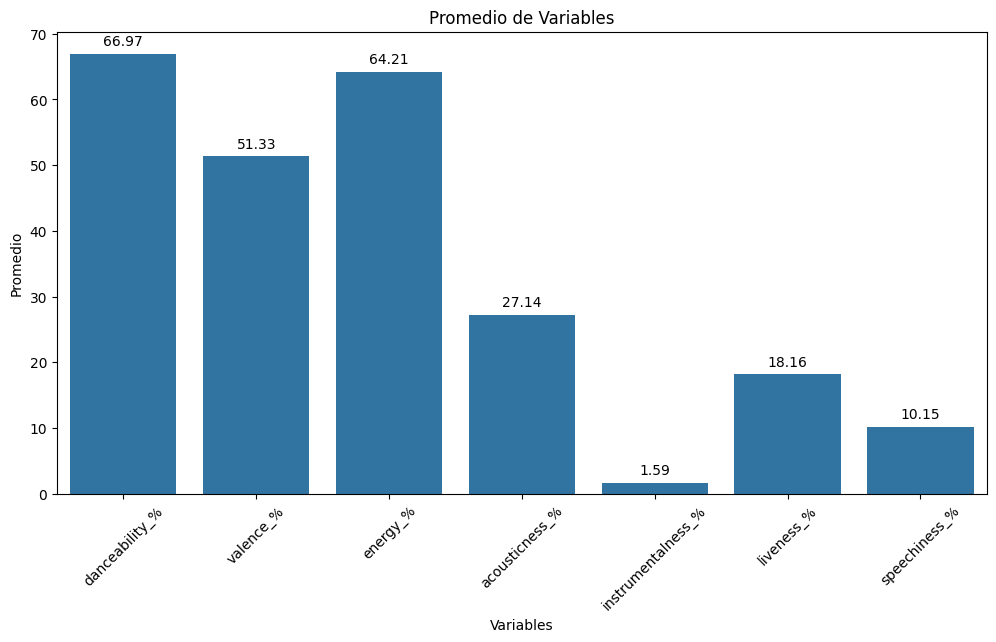

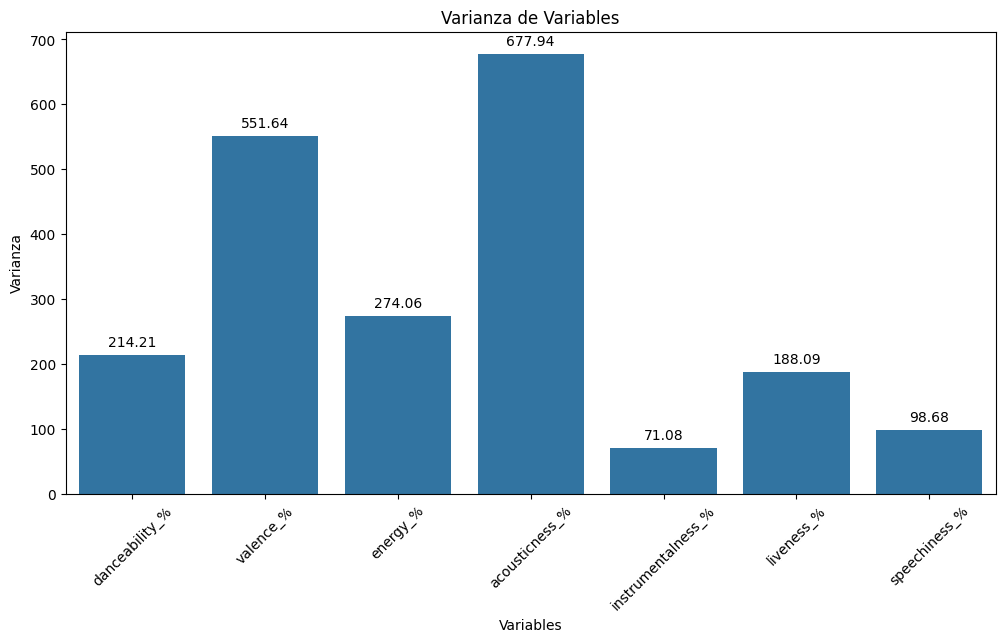

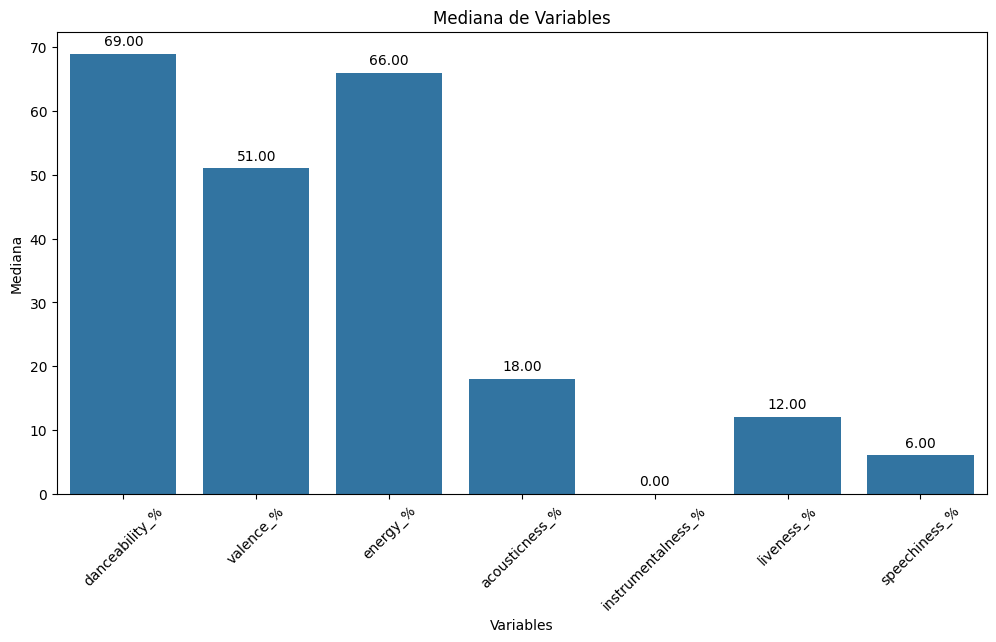

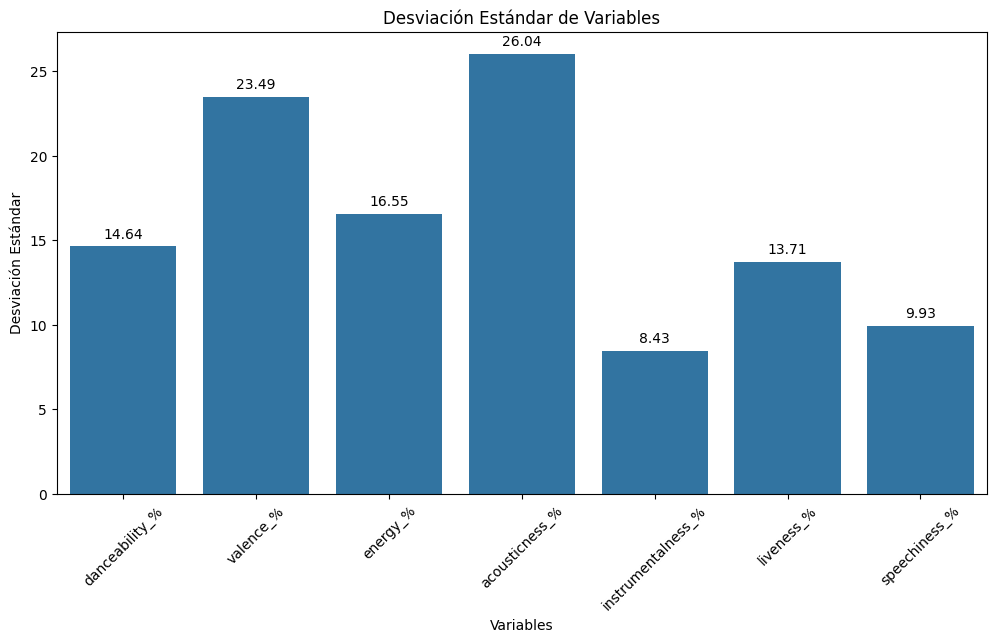

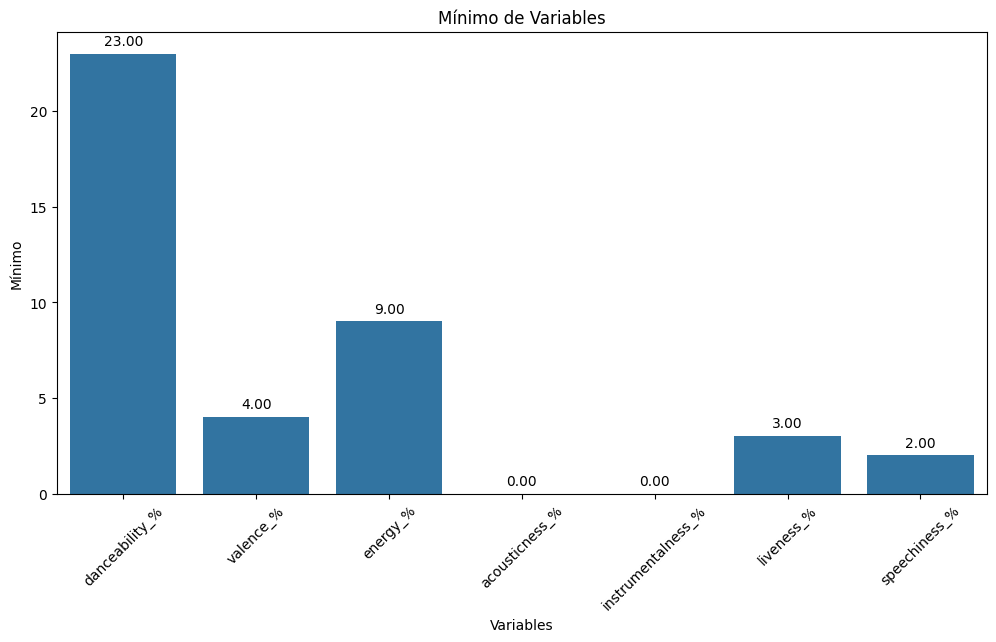

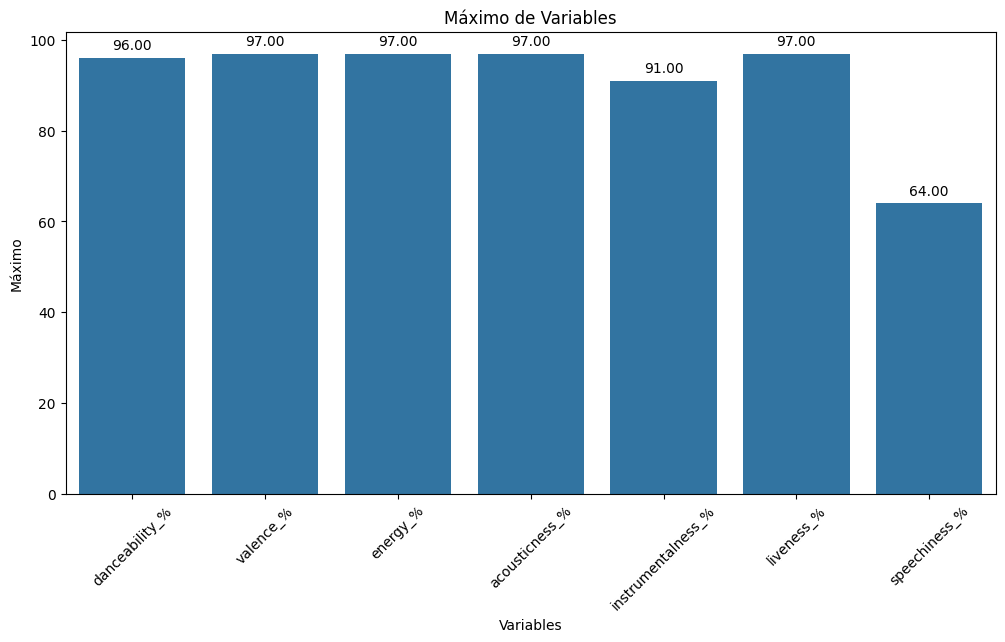

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Definir las variables a calcular las métricas (excluyendo 'streams', 'bpm' y 'participacion_total')
variables = ['danceability_%', 'valence_%', 'energy_%',
             'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Calcular métricas estadísticas para cada variable
summary_table = df_cleaned[variables].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'count'])

# Transponer la tabla para una mejor visualización
summary_table = summary_table.T

# Renombrar columnas para mayor claridad
summary_table.columns = ['Promedio', 'Mediana', 'Desviación Estándar', 'Varianza', 'Mínimo', 'Máximo', 'Número de Elementos']

# Mostrar la tabla en un Jupyter Notebook
display(summary_table)

# Guardar la tabla en un archivo Excel
summary_table.to_excel("summary_statistics.xlsx", index=True)

# Crear gráficos de barras para cada métrica
metrics = ['Promedio', 'Varianza', 'Mediana', 'Desviación Estándar', 'Mínimo', 'Máximo']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=summary_table.index, y=summary_table[metric])
    plt.title(f'{metric} de Variables')
    plt.xlabel('Variables')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

    # Añadir etiquetas de datos
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

    plt.show()


## Hito 3

En este hito aplicarás la regresión linear para las mismas hipótesis analizadas en el hito 1.

- [ ]  Las canciones con un mayor BPM (Beats Por Minuto) tienen más éxito en términos de streams en Spotify
- [ ]  Las canciones más populares en el ranking de Spotify también tienen un comportamiento similar en otras plataformas como Deezer
- [ ]  La presencia de una canción en un mayor número de playlists se relaciona con un mayor número de streams
- [ ]  Los artistas con un mayor número de canciones en Spotify tienen más streams
- [ ]  Las características de la canción influyen en el éxito en términos de streams en Spotify

---

Meta

🔴 Regresión lineal	Entendimiento más profundizado de la relación lineal entre dos variables continuas

Cada una debe hacer al menos una vez este análisis, por ejemplo una hace para streams por bpm y la otra streams por total_playlists.

Lo importante también es discutir los resultados y explorar las otras variables.

⚠️ Para empezar, abstrae la idea de dividir la data en “entrenamiento” y “test”. Este concepto será abordado con más profundidad en los próximos proyectos.

🎥 Guia práctico de los pasos para ejecutar una regresión lineal simple en Python con el paquete sklearn..

📄 Tutorial práctico de los pasos para ejecutar (e interpretar) una regresión lineal simple en Python.

🧑‍💻Pide ayuda a Chat GPT para interpretar los resultados.

---

🟠representar datos a través de gráficos o visuales avanzados	Crear un gráfico de dispersión (scatter plot) con la reta obtenida de la regresión linear simple.

Cada una debe hacer al menos una vez este gráfico, por ejemplo una hace para streams por bpm y la otra streams por total_playlists.

Lo importante también es discutir los resultados y explorar las otras variables.

🎥 Guia práctico de los pasos para ejecutar una regresión lineal simple en Python con el paquete sklearn.

📄 Tutorial práctico de los pasos para ejecutar (y interpretar) una regresión lineal simple en Python.

📄 Manual del paquete matplotlib./

🧑‍💻 Pide a Chat GPT que te ayude con el código para crear una scatterplot con el paquete matplotlib y agrega a ese gráfico la línea obtenida de la regresión lineal simple.

🧑‍💻 Pide a Chat GPT que te ayude con el código para “customizar” tu gráfica. Cambia colores, nombres de los ejes, etc etc.

---

### Checklist

- [ ]  ¿Has aplicado la técnica de regresión lineal simple (y la entendiste/interpretaste), al menos una vez?
- [ ]  ¿Has elaborado al menos un gráfico de dispersión (scatter plot) junto con la línea de regresión resultante?
- [ ] ¿Has discutido y seleccionado la información relevante para la presentación en conjunto con tu dupla (si es que lo has hecho en dupla)?



Coeficientes del modelo: [-100034.94960625]
Intercepto del modelo: 509771949.2442488
Error cuadrático medio (MSE): 3.78954009523637e+17


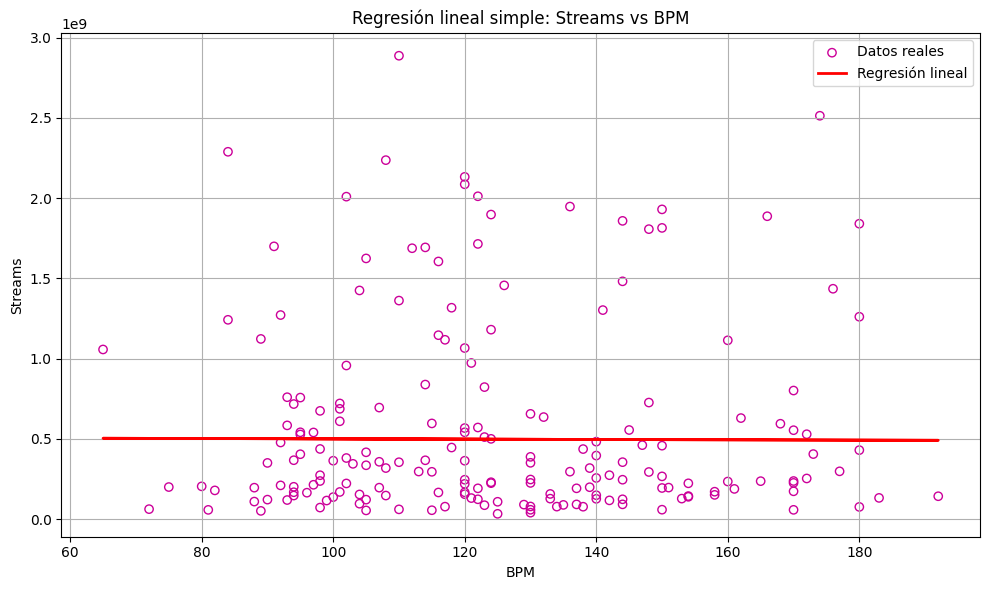

In [ ]:
# Instalar scikit-learn si no está instalado
!pip install scikit-learn

# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Definir la variable dependiente (target) y la variable independiente (features)
X = df_cleaned[['bpm']]  # Variable independiente (BPM)
y = df_cleaned['streams']  # Variable dependiente (Streams)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)

# Mostrar los coeficientes del modelo y el error cuadrático medio
print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)
print("Error cuadrático medio (MSE):", mse)

# Configurar el estilo del gráfico
plt.figure(figsize=(10, 6))

# Graficar el scatter plot con círculos de borde y fondo transparente
plt.scatter(X_test, y_test, edgecolor='#cc0099', facecolor='none', label='Datos reales')

# Graficar la línea de regresión con etiqueta de datos
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')


# Configurar título y etiquetas de ejes
plt.title('Regresión lineal simple: Streams vs BPM')
plt.xlabel('BPM')
plt.ylabel('Streams')

# Mostrar la leyenda, cuadrícula y ajustar el diseño
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


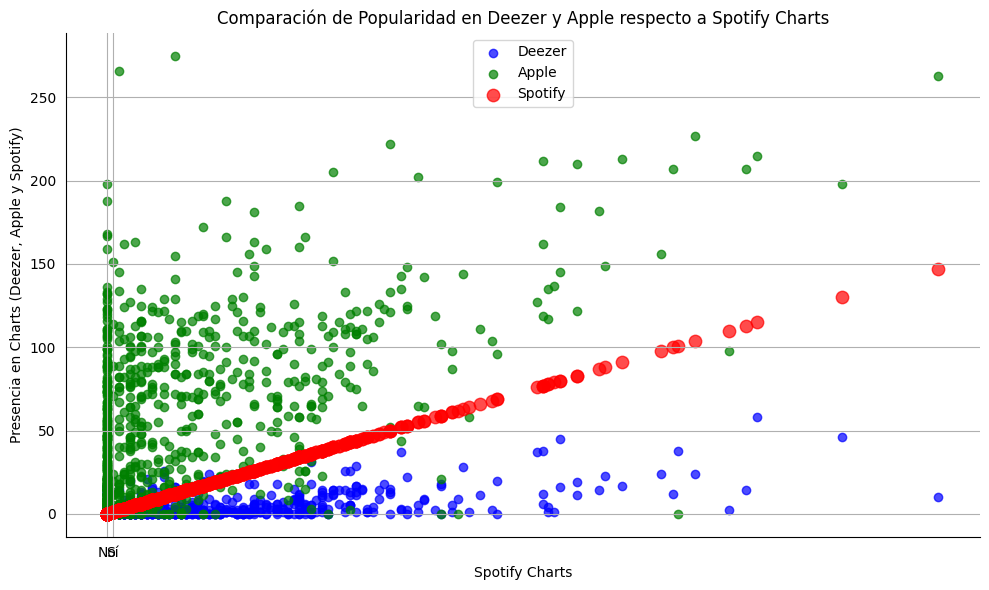

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Filtrar datos para canciones populares en Spotify, Deezer y Apple
df_filtered = df_cleaned[
    np.logical_or.reduce([
        df_cleaned['in_spotify_charts'].astype(bool),
        df_cleaned['in_deezer_charts'].astype(bool),
        df_cleaned['in_apple_charts'].astype(bool)
    ])
]

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Scatter plot para Deezer Charts vs Spotify Charts
plt.scatter(df_filtered['in_spotify_charts'], df_filtered['in_deezer_charts'], color='blue', label='Deezer', alpha=0.7)

# Scatter plot para Apple Charts vs Spotify Charts
plt.scatter(df_filtered['in_spotify_charts'], df_filtered['in_apple_charts'], color='green', label='Apple', alpha=0.7)

# Scatter plot para Spotify Charts
plt.scatter(df_filtered['in_spotify_charts'], df_filtered['in_spotify_charts'], marker='o', s=80, color='red', label='Spotify', alpha=0.7)

# Configurar título y etiquetas de ejes
plt.title('Comparación de Popularidad en Deezer y Apple respecto a Spotify Charts')
plt.xlabel('Spotify Charts')
plt.ylabel('Presencia en Charts (Deezer, Apple y Spotify)')
plt.xticks([0, 1], ['No', 'Sí'])  # Cambiar etiquetas del eje x a 'No' y 'Sí'

# Ajustar las posiciones de las etiquetas del eje x para mayor claridad
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar la leyenda, cuadrícula y ajustar el diseño
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico de dispersión comparativo
plt.show()


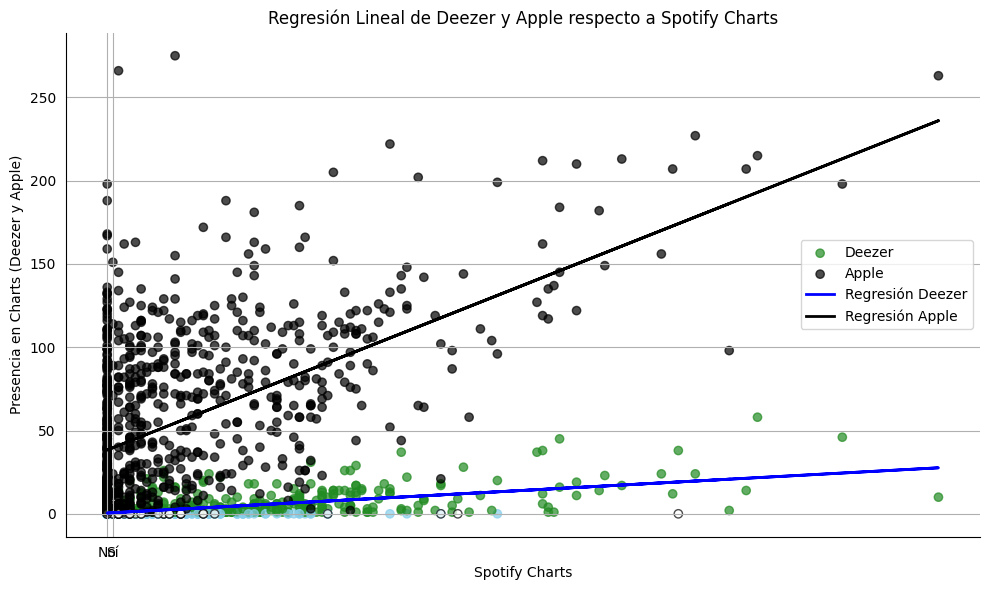


Error Cuadrático Medio (MSE):
Deezer vs Spotify: 24.59
Apple vs Spotify: 1815.13

Explicación del gráfico:
- La línea azul ('Regresión Deezer') representa la tendencia de cómo las canciones populares en Deezer
  se comportan en relación con Spotify Charts. Si la línea sube, indica una correlación positiva.
- La línea negra ('Regresión Apple') muestra la relación entre las canciones populares en Apple Music
  y Spotify Charts. Su inclinación indica la dirección de la relación: hacia arriba significa correlación positiva,
  hacia abajo significa correlación negativa.
- Los círculos verdes oscuros representan las canciones populares en Deezer. Los círculos celestes indican ausencia
  en los charts de Spotify.
- Los círculos blancos con borde negro representan las canciones populares en Apple Music. Los círculos rellenos de negro
  indican ausencia en los charts de Spotify, mientras que los círculos blancos indican presencia.


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Filtrar datos para canciones populares en Spotify, Deezer y Apple
df_filtered = df_cleaned[
    np.logical_or.reduce([
        df_cleaned['in_spotify_charts'].astype(bool),
        df_cleaned['in_deezer_charts'].astype(bool),
        df_cleaned['in_apple_charts'].astype(bool)
    ])
]

# Seleccionar las variables de interés
X = df_filtered['in_spotify_charts'].values.reshape(-1, 1)
y_deezer = df_filtered['in_deezer_charts'].values
y_apple = df_filtered['in_apple_charts'].values

# Crear modelo de regresión lineal para Deezer Charts vs Spotify Charts
model_deezer = LinearRegression()
model_deezer.fit(X, y_deezer)

# Predecir valores de Deezer Charts usando el modelo
y_deezer_pred = model_deezer.predict(X)

# Calcular el Error Cuadrático Medio (MSE) para Deezer Charts
mse_deezer = mean_squared_error(y_deezer, y_deezer_pred)

# Crear modelo de regresión lineal para Apple Charts vs Spotify Charts
model_apple = LinearRegression()
model_apple.fit(X, y_apple)

# Predecir valores de Apple Charts usando el modelo
y_apple_pred = model_apple.predict(X)

# Calcular el Error Cuadrático Medio (MSE) para Apple Charts
mse_apple = mean_squared_error(y_apple, y_apple_pred)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Scatter plot para Deezer Charts vs Spotify Charts
colors_deezer = ['#228B22' if y else '#87CEEB' for y in df_filtered['in_deezer_charts'].astype(bool)]
plt.scatter(X, y_deezer, color=colors_deezer, label='Deezer', alpha=0.7)

# Scatter plot para Apple Charts vs Spotify Charts
colors_apple = ['black' if y else 'white' for y in df_filtered['in_apple_charts'].astype(bool)]
plt.scatter(X, y_apple, color=colors_apple, label='Apple', alpha=0.7, edgecolors='black')

# Regresión lineal para Deezer Charts vs Spotify Charts
plt.plot(X, model_deezer.predict(X), color='blue', linewidth=2, label='Regresión Deezer')

# Regresión lineal para Apple Charts vs Spotify Charts
plt.plot(X, model_apple.predict(X), color='black', linewidth=2, label='Regresión Apple')

# Configurar título y etiquetas de ejes
plt.title('Regresión Lineal de Deezer y Apple respecto a Spotify Charts')
plt.xlabel('Spotify Charts')
plt.ylabel('Presencia en Charts (Deezer y Apple)')
plt.xticks([0, 1], ['No', 'Sí'])  # Cambiar etiquetas del eje x a 'No' y 'Sí'

# Ajustar las posiciones de las etiquetas del eje x para mayor claridad
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar la leyenda, cuadrícula y ajustar el diseño
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico de dispersión comparativo con regresión lineal
plt.show()

# Mostrar el MSE para Deezer y Apple
print("\nError Cuadrático Medio (MSE):")
print(f"Deezer vs Spotify: {mse_deezer:.2f}")
print(f"Apple vs Spotify: {mse_apple:.2f}")

# Explicación del gráfico:
print("\nExplicación del gráfico:")
print("- La línea azul ('Regresión Deezer') representa la tendencia de cómo las canciones populares en Deezer")
print("  se comportan en relación con Spotify Charts. Si la línea sube, indica una correlación positiva.")
print("- La línea negra ('Regresión Apple') muestra la relación entre las canciones populares en Apple Music")
print("  y Spotify Charts. Su inclinación indica la dirección de la relación: hacia arriba significa correlación positiva,")
print("  hacia abajo significa correlación negativa.")
print("- Los círculos verdes oscuros representan las canciones populares en Deezer. Los círculos celestes indican ausencia")
print("  en los charts de Spotify.")
print("- Los círculos blancos con borde negro representan las canciones populares en Apple Music. Los círculos rellenos de negro")
print("  indican ausencia en los charts de Spotify, mientras que los círculos blancos indican presencia.")


### Deezer
los circulos, verdes pastel para si

celeste para no.

con la linea de regresion azul fuerte

### Apple
Si - circulito blanco de borde negro

No - sea el relleno negro

con la linea de regresion negra.

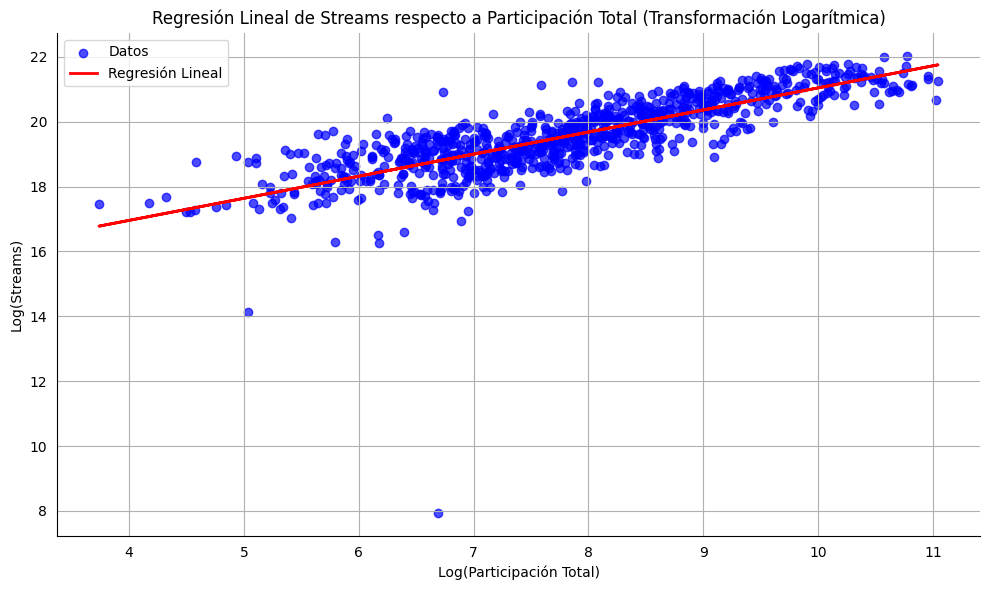


Error Cuadrático Medio (MSE):
Streams vs Participacion Total: 0.47

Explicación del gráfico:
- La línea roja ('Regresión Lineal') representa la tendencia de cómo la participación total
  afecta al número de streams (ambos en escala logarítmica). Si la línea sube, indica una correlación positiva.
- Los puntos azules representan los datos observados de streams en relación con la participación total.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Filtrar datos para canciones populares en Spotify, Deezer y Apple
df_filtered = df_cleaned[
    np.logical_or.reduce([
        df_cleaned['in_spotify_charts'].astype(bool),
        df_cleaned['in_deezer_charts'].astype(bool),
        df_cleaned['in_apple_charts'].astype(bool)
    ])
]

# Limpiar datos nulos y ceros en participacion_total y streams
df_filtered = df_filtered.dropna(subset=['participacion_total', 'streams'])
df_filtered = df_filtered[df_filtered['participacion_total'] != 0]

# Convertir participacion_total y streams a tipo numérico si es necesario
df_filtered['participacion_total'] = pd.to_numeric(df_filtered['participacion_total'], errors='coerce')
df_filtered['streams'] = pd.to_numeric(df_filtered['streams'], errors='coerce')

# Eliminar filas con valores nulos después de la conversión
df_filtered = df_filtered.dropna(subset=['participacion_total', 'streams'])

# Aplicar la transformación logarítmica a participacion_total y streams
X_streams = np.log1p(df_filtered['participacion_total'].values)  # log(1 + x) para manejar ceros
y_streams = np.log1p(df_filtered['streams'].values)  # log(1 + y) para manejar ceros

# Asegurar que las dimensiones sean adecuadas para la regresión lineal
X_streams = X_streams.reshape(-1, 1)

# Crear modelo de regresión lineal para Streams vs Participacion Total
model_streams = LinearRegression()
model_streams.fit(X_streams, y_streams)

# Predecir valores de Streams usando el modelo
y_streams_pred = model_streams.predict(X_streams)

# Calcular el Error Cuadrático Medio (MSE) para Streams
mse_streams = mean_squared_error(y_streams, y_streams_pred)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Scatter plot para Streams vs Participacion Total
plt.scatter(X_streams, y_streams, color='blue', label='Datos', alpha=0.7)

# Regresión lineal para Streams vs Participacion Total
plt.plot(X_streams, y_streams_pred, color='red', linewidth=2, label='Regresión Lineal')

# Configurar título y etiquetas de ejes
plt.title('Regresión Lineal de Streams respecto a Participación Total (Transformación Logarítmica)')
plt.xlabel('Log(Participación Total)')
plt.ylabel('Log(Streams)')

# Ajustar las posiciones de las etiquetas del eje x para mayor claridad
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar la leyenda, cuadrícula y ajustar el diseño
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico de dispersión comparativo con regresión lineal
plt.show()

# Mostrar el MSE para Streams
print("\nError Cuadrático Medio (MSE):")
print(f"Streams vs Participacion Total: {mse_streams:.2f}")

# Explicación del gráfico:
print("\nExplicación del gráfico:")
print("- La línea roja ('Regresión Lineal') representa la tendencia de cómo la participación total")
print("  afecta al número de streams (ambos en escala logarítmica). Si la línea sube, indica una correlación positiva.")
print("- Los puntos azules representan los datos observados de streams en relación con la participación total.")


La presencia de una canción en un mayor número de playlists se relaciona con un mayor número de streams

 Los artistas con un mayor número de canciones en Spotify tienen más streams

 Las características de la canción influyen en el éxito en términos de streams en Spotify

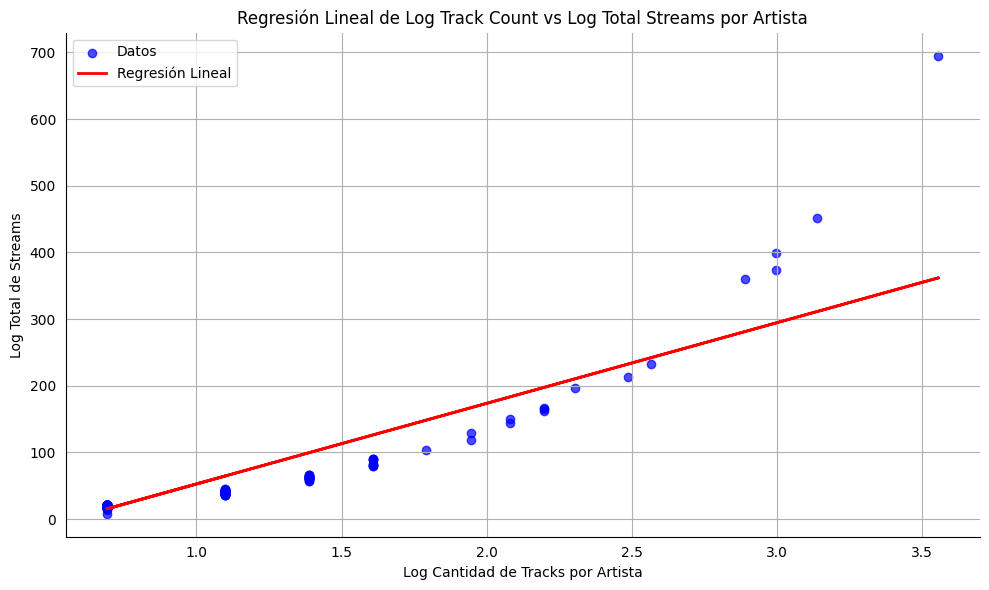


Error Cuadrático Medio (MSE):
Log Track Count vs Log Total Streams: 393.90

Explicación del gráfico:
- La línea roja ('Regresión Lineal') representa la tendencia de cómo la cantidad de tracks
  por artista en escala logarítmica afecta al total de streams en escala logarítmica.
- Los puntos azules representan los datos observados de log total de streams en relación con
  el log de la cantidad de tracks por artista.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Convertir 'total_streams' a numérico, ignorando errores
artist_counts['total_streams'] = pd.to_numeric(artist_counts['total_streams'], errors='coerce')

# Eliminar filas con NaNs en 'total_streams'
artist_counts.dropna(subset=['total_streams'], inplace=True)

# Aplicar transformación logarítmica a los datos
artist_counts['log_track_count'] = np.log1p(artist_counts['track_count'])
artist_counts['log_total_streams'] = np.log1p(artist_counts['total_streams'])

# Seleccionar las variables de interés para la regresión lineal
X_artist = artist_counts['log_track_count'].values.reshape(-1, 1)
y_streams_artist = artist_counts['log_total_streams'].values

# Crear modelo de regresión lineal
model_artist = LinearRegression()
model_artist.fit(X_artist, y_streams_artist)

# Predecir valores de streams usando el modelo
y_streams_pred_artist = model_artist.predict(X_artist)

# Calcular el Error Cuadrático Medio (MSE)
mse_artist = mean_squared_error(y_streams_artist, y_streams_pred_artist)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Scatter plot para Log Track Count vs Log Total Streams
plt.scatter(artist_counts['log_track_count'], artist_counts['log_total_streams'], color='blue', label='Datos', alpha=0.7)

# Regresión lineal para Log Track Count vs Log Total Streams
plt.plot(X_artist, y_streams_pred_artist, color='red', linewidth=2, label='Regresión Lineal')

# Configurar título y etiquetas de ejes
plt.title('Regresión Lineal de Log Track Count vs Log Total Streams por Artista')
plt.xlabel('Log Cantidad de Tracks por Artista')
plt.ylabel('Log Total de Streams')

# Ajustar las posiciones de las etiquetas del eje x para mayor claridad
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar la leyenda, cuadrícula y ajustar el diseño
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico de dispersión comparativo con regresión lineal
plt.show()

# Mostrar el MSE
print("\nError Cuadrático Medio (MSE):")
print(f"Log Track Count vs Log Total Streams: {mse_artist:.2f}")

# Explicación del gráfico:
print("\nExplicación del gráfico:")
print("- La línea roja ('Regresión Lineal') representa la tendencia de cómo la cantidad de tracks")
print("  por artista en escala logarítmica afecta al total de streams en escala logarítmica.")
print("- Los puntos azules representan los datos observados de log total de streams en relación con")
print("  el log de la cantidad de tracks por artista.")


<ipython-input-68-6164e603de74>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['streams'] = np.log1p(low_data['streams'])
<ipython-input-68-6164e603de74>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_data['streams'] = np.log1p(high_data['streams'])
<ipython-input-68-6164e603de74>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

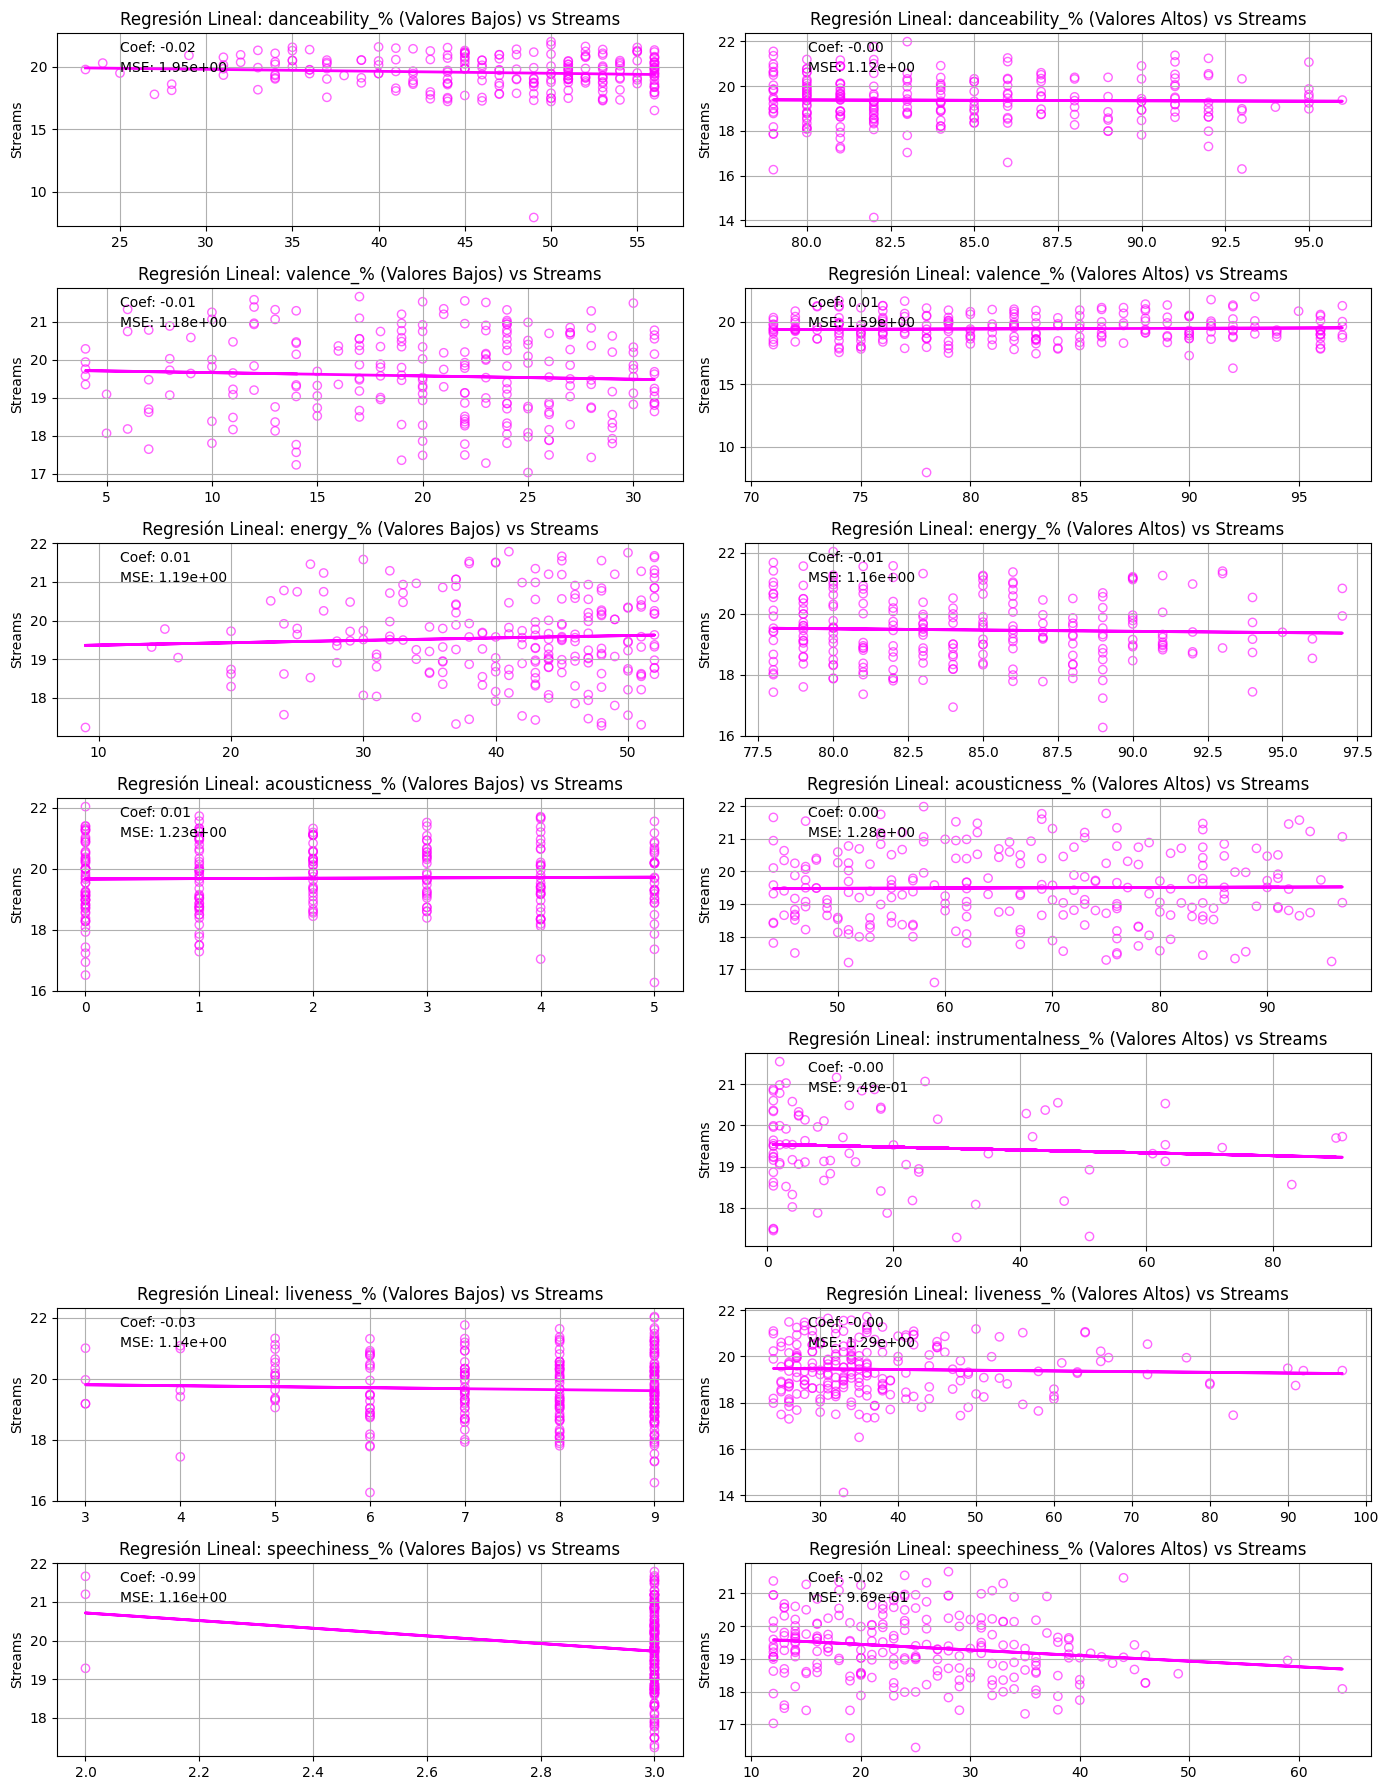

Resumen:
Característica: danceability_%
Coeficiente de regresión (Valores Bajos): -0.02
MSE (Valores Bajos): 1.95e+00
Coeficiente de regresión (Valores Altos): -0.00
MSE (Valores Altos): 1.12e+00
--------------------------------------
Característica: valence_%
Coeficiente de regresión (Valores Bajos): -0.01
MSE (Valores Bajos): 1.18e+00
Coeficiente de regresión (Valores Altos): 0.01
MSE (Valores Altos): 1.59e+00
--------------------------------------
Característica: energy_%
Coeficiente de regresión (Valores Bajos): 0.01
MSE (Valores Bajos): 1.19e+00
Coeficiente de regresión (Valores Altos): -0.01
MSE (Valores Altos): 1.16e+00
--------------------------------------
Característica: acousticness_%
Coeficiente de regresión (Valores Bajos): 0.01
MSE (Valores Bajos): 1.23e+00
Coeficiente de regresión (Valores Altos): 0.00
MSE (Valores Altos): 1.28e+00
--------------------------------------
Característica: instrumentalness_%
No hay suficientes datos para valores bajos.
Coeficiente de regresi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Definir las variables de interés
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%']
X = df_cleaned[features].values
y = df_cleaned['streams'].values

# Inicializar listas para almacenar resultados
coefficients = []
mse_scores = []

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 18))

# Función para convertir valores RGB de 0-255 a 0-1
def rgb_norm(rgb_tuple):
    return tuple(np.array(rgb_tuple) / 255)

# Iterar sobre cada característica y ajustar un modelo de regresión lineal
for i, feature in enumerate(features):
    # Calcular los percentiles 25 y 75 para dividir en valores bajos y altos
    low_threshold = np.percentile(df_cleaned[feature], 25)
    high_threshold = np.percentile(df_cleaned[feature], 75)

    # Filtrar los datos en valores bajos y altos
    low_data = df_cleaned[df_cleaned[feature] < low_threshold]
    high_data = df_cleaned[df_cleaned[feature] > high_threshold]

    # Aplicar transformación logarítmica solo si los datos de 'streams' son numéricos
    if pd.api.types.is_numeric_dtype(low_data['streams']):
        low_data['streams'] = np.log1p(low_data['streams'])

    if pd.api.types.is_numeric_dtype(high_data['streams']):
        high_data['streams'] = np.log1p(high_data['streams'])

    # Verificar si hay datos disponibles para valores bajos y altos
    if not low_data.empty:
        # Configurar subplots para valores bajos
        plt.subplot(7, 2, 2*i+1)
        model_low = LinearRegression()
        model_low.fit(low_data[[feature]], low_data['streams'])
        y_pred_low = model_low.predict(low_data[[feature]])
        plt.scatter(low_data[feature], low_data['streams'], edgecolor=rgb_norm((255, 0, 255)), facecolor='none', alpha=0.6)
        plt.plot(low_data[feature], y_pred_low, color=rgb_norm((255, 0, 255)), linewidth=2)
        plt.title(f'Regresión Lineal: {feature} (Valores Bajos) vs Streams')
        plt.ylabel('Streams')
        plt.grid(True)
        plt.text(0.1, 0.9, f'Coef: {model_low.coef_[0]:.2f}', transform=plt.gca().transAxes)
        mse_low = mean_squared_error(low_data['streams'], y_pred_low)
        plt.text(0.1, 0.8, f'MSE: {mse_low:.2e}', transform=plt.gca().transAxes)

        # Guardar coeficientes y MSE para valores bajos
        coefficients.append((model_low.coef_[0], None))  # None para valores altos
        mse_scores.append((mse_low, None))  # None para valores altos

    if not high_data.empty:
        # Configurar subplots para valores altos
        plt.subplot(7, 2, 2*i+2)
        model_high = LinearRegression()
        model_high.fit(high_data[[feature]], high_data['streams'])
        y_pred_high = model_high.predict(high_data[[feature]])
        plt.scatter(high_data[feature], high_data['streams'], edgecolor=rgb_norm((255, 0, 255)), facecolor='none', alpha=0.6)
        plt.plot(high_data[feature], y_pred_high, color=rgb_norm((255, 0, 255)), linewidth=2)
        plt.title(f'Regresión Lineal: {feature} (Valores Altos) vs Streams')
        plt.ylabel('Streams')
        plt.grid(True)
        plt.text(0.1, 0.9, f'Coef: {model_high.coef_[0]:.2f}', transform=plt.gca().transAxes)
        mse_high = mean_squared_error(high_data['streams'], y_pred_high)
        plt.text(0.1, 0.8, f'MSE: {mse_high:.2e}', transform=plt.gca().transAxes)

        # Actualizar coeficientes y MSE para valores altos
        if i < len(coefficients):
            coefficients[i] = (coefficients[i][0], model_high.coef_[0])
            mse_scores[i] = (mse_scores[i][0], mse_high)
        else:
            coefficients.append((None, model_high.coef_[0]))
            mse_scores.append((None, mse_high))

# Ajustar el diseño del gráfico general
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Comparar los resultados de los coeficientes y MSE
print("Resumen:")
for i, feature in enumerate(features):
    print(f"Característica: {feature}")
    if coefficients[i][0] is not None:
        print(f"Coeficiente de regresión (Valores Bajos): {coefficients[i][0]:.2f}")
        print(f"MSE (Valores Bajos): {mse_scores[i][0]:.2e}")
    else:
        print("No hay suficientes datos para valores bajos.")

    if coefficients[i][1] is not None:
        print(f"Coeficiente de regresión (Valores Altos): {coefficients[i][1]:.2f}")
        print(f"MSE (Valores Altos): {mse_scores[i][1]:.2e}")
    else:
        print("No hay suficientes datos para valores altos.")

    print("--------------------------------------")


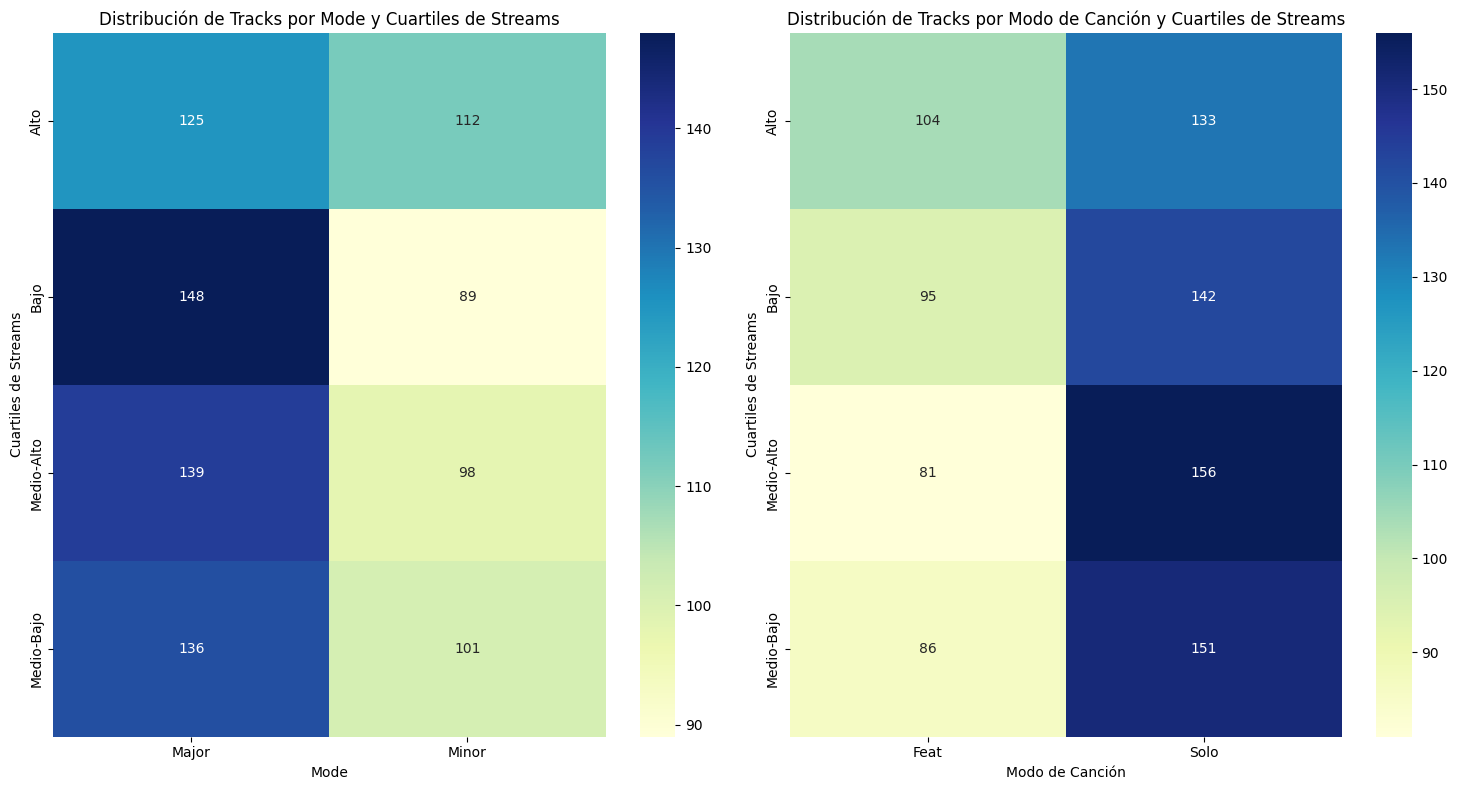

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los nombres de los cuartiles
cuartiles_dict = {4: 'Alto', 3: 'Medio-Alto', 2: 'Medio-Bajo', 1: 'Bajo'}
df_cleaned['cuartiles_categoria'] = df_cleaned['cuartiles_streams'].map(cuartiles_dict)

# Crear una tabla pivot para el heatmap con mode
pivot_table_mode = df_cleaned.pivot_table(index='cuartiles_categoria', columns='mode', values='track_id', aggfunc='count', fill_value=0)

# Crear una tabla pivot para el heatmap con modo de canción
pivot_table_modocancion = df_cleaned.pivot_table(index='cuartiles_categoria', columns='modo_cancion', values='track_id', aggfunc='count', fill_value=0)

# Configurar tamaño de la figura
plt.figure(figsize=(15, 8))

# Primer heatmap para mode
plt.subplot(1, 2, 1)
sns.heatmap(pivot_table_mode, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribución de Tracks por Mode y Cuartiles de Streams')
plt.xlabel('Mode')
plt.ylabel('Cuartiles de Streams')

# Segundo heatmap para modo de canción
plt.subplot(1, 2, 2)
sns.heatmap(pivot_table_modocancion, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribución de Tracks por Modo de Canción y Cuartiles de Streams')
plt.xlabel('Modo de Canción')
plt.ylabel('Cuartiles de Streams')

# Ajustar espaciado y mostrar la figura
plt.tight_layout()
plt.show()


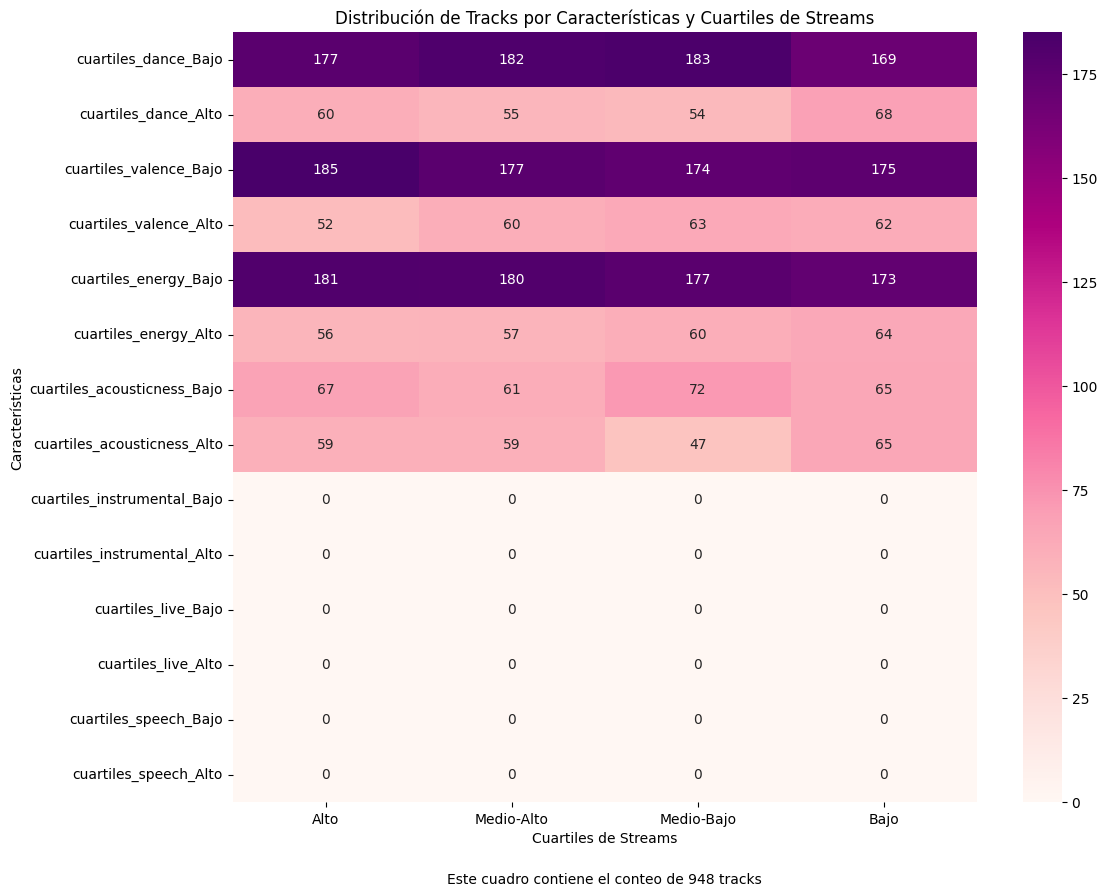

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes df_cleaned con los datos cargados y limpios

# Definir nombres y orden de cuartiles para streams y características
cuartiles_dict = {4: 'Alto', 3: 'Medio-Alto', 2: 'Medio-Bajo', 1: 'Bajo'}
cuartiles_features_order = {
    'cuartiles_dance': ['Bajo', 'Alto'],
    'cuartiles_valence': ['Bajo', 'Alto'],
    'cuartiles_energy': ['Bajo', 'Alto'],
    'cuartiles_acousticness': ['Bajo', 'Alto'],
    'cuartiles_instrumental': ['Bajo', 'Alto'],
    'cuartiles_live': ['Bajo', 'Alto'],
    'cuartiles_speech': ['Bajo', 'Alto']
}

# Función para contar tracks por combinación de características y cuartiles de streams
def count_tracks(df, feature, cuartile):
    counts = {}
    for cuartile_value in cuartiles_features_order[feature]:
        counts[cuartile_value] = df[(df['cuartiles_streams'] == cuartile) & (df[feature] == cuartile_value)].shape[0]
    return counts

# Crear DataFrame para el heatmap
heatmap_data = pd.DataFrame()

# Generar los datos para el heatmap
for feature, cuartiles in cuartiles_features_order.items():
    for cuartile in cuartiles_dict.keys():
        count = count_tracks(df_cleaned, feature, cuartile)
        for cuartile_value in cuartiles:
            heatmap_data.loc[f"{feature}_{cuartile_value}", cuartiles_dict[cuartile]] = count.get(cuartile_value, 0)

# Crear el heatmap usando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap=sns.color_palette("RdPu", as_cmap=True))
plt.title('Distribución de Tracks por Características y Cuartiles de Streams')
plt.xlabel('Cuartiles de Streams')
plt.ylabel('Características')

# Agregar texto con el conteo de tracks
plt.text(0.5, -0.1, f"Este cuadro contiene el conteo de {df_cleaned.shape[0]} tracks",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('heatmap_tracks_count.jpg', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
from scipy import stats

# Datos de promedios por cuartiles de categoría para bpm y streams
promedios = pd.DataFrame({
    'cuartiles_categoria': ['Alto', 'Bajo', 'Medio-Alto', 'Medio-Bajo'],
    'bpm': [123.240506, 120.860759, 120.915612, 124.978903],
    'streams': [454339300.0, 600168900.0, 373394900.0, 628908500.0]
})

# Calcular el promedio de bpm por cuartiles_categoria
promedios_bpm = promedios.groupby('cuartiles_categoria')['bpm'].mean().reset_index()
print("Promedios por cuartiles de categoría para bpm:")
print(promedios_bpm)

# Calcular el promedio de streams por cuartiles_categoria
promedios_streams = promedios.groupby('cuartiles_categoria')['streams'].mean().reset_index()
print("\nPromedios por cuartiles de categoría para streams:")
print(promedios_streams)

# Obtener datos para las pruebas de hipótesis
bpm_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Alto', 'bpm']
bpm_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Bajo', 'bpm']
bpm_medio_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Alto', 'bpm']
bpm_medio_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Bajo', 'bpm']

# Realizar pruebas de hipótesis
# Test t de Student para bpm entre cuartiles Alto y Bajo
t_statistic_bpm_ab, p_value_bpm_ab = stats.ttest_ind(bpm_alto, bpm_bajo, equal_var=False)
print(f"\nPara cuartiles de categoría Alto y Bajo:")
print(f"T-statistic (bpm): {t_statistic_bpm_ab}, p-value (bpm): {p_value_bpm_ab}")

# Test t de Student para bpm entre cuartiles Medio-Alto y Medio-Bajo
t_statistic_bpm_mm, p_value_bpm_mm = stats.ttest_ind(bpm_medio_alto, bpm_medio_bajo, equal_var=False)
print(f"\nPara cuartiles de categoría Medio-Alto y Medio-Bajo:")
print(f"T-statistic (bpm): {t_statistic_bpm_mm}, p-value (bpm): {p_value_bpm_mm}")

from scipy import stats

# Obtener datos para las pruebas de hipótesis usando promedios
bpm_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Alto', 'bpm']
bpm_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Bajo', 'bpm']
bpm_medio_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Alto', 'bpm']
bpm_medio_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Bajo', 'bpm']

# Test de Wilcoxon-Mann-Whitney para bpm entre cuartiles Alto y Bajo
w_statistic_bpm_ab, p_value_bpm_ab = stats.mannwhitneyu(bpm_alto, bpm_bajo)
print(f"\nPara cuartiles de categoría Alto y Bajo:")
print(f"U-statistic (bpm): {w_statistic_bpm_ab}, p-value (bpm): {p_value_bpm_ab}")

# Test de Wilcoxon-Mann-Whitney para bpm entre cuartiles Medio-Alto y Medio-Bajo
w_statistic_bpm_mm, p_value_bpm_mm = stats.mannwhitneyu(bpm_medio_alto, bpm_medio_bajo)
print(f"\nPara cuartiles de categoría Medio-Alto y Medio-Bajo:")
print(f"U-statistic (bpm): {w_statistic_bpm_mm}, p-value (bpm): {p_value_bpm_mm}")



Promedios por cuartiles de categoría para bpm:
  cuartiles_categoria         bpm
0                Alto  123.240506
1                Bajo  120.860759
2          Medio-Alto  120.915612
3          Medio-Bajo  124.978903

Promedios por cuartiles de categoría para streams:
  cuartiles_categoria      streams
0                Alto  454339300.0
1                Bajo  600168900.0
2          Medio-Alto  373394900.0
3          Medio-Bajo  628908500.0

Para cuartiles de categoría Alto y Bajo:
T-statistic (bpm): nan, p-value (bpm): nan

Para cuartiles de categoría Medio-Alto y Medio-Bajo:
T-statistic (bpm): nan, p-value (bpm): nan

Para cuartiles de categoría Alto y Bajo:
U-statistic (bpm): 1.0, p-value (bpm): 1.0

Para cuartiles de categoría Medio-Alto y Medio-Bajo:
U-statistic (bpm): 0.0, p-value (bpm): 1.0


Para cuartiles de categoría Alto y Bajo:

U-Statistic (bpm): 1.0
p-value (bpm): 1.0
El valor p (p-value) es 1.0, lo cual es alto y sugiere que no hay diferencia significativa en los promedios de bpm entre los cuartiles de categoría Alto y Bajo. Esto significa que no podemos rechazar la hipótesis nula de que los promedios de bpm son iguales entre estos dos grupos.

Para cuartiles de categoría Medio-Alto y Medio-Bajo:

U-Statistic (bpm): 0.0
p-value (bpm): 1.0
En este caso, nuevamente el valor p (p-value) es 1.0, indicando que no hay diferencia significativa en los promedios de bpm entre los cuartiles de categoría Medio-Alto y Medio-Bajo. No podemos rechazar la hipótesis nula de que los promedios de bpm son iguales entre estos dos grupos.

Interpretación General:
Los valores altos de p-value (cerca de 1.0) sugieren que no hay suficiente evidencia para afirmar que existen diferencias significativas en los promedios de bpm entre los grupos comparados (Alto vs Bajo y Medio-Alto vs Medio-Bajo).
Esto puede indicar que, desde el punto de vista estadístico, los promedios de bpm no varían significativamente entre los cuartiles de categoría que has analizado.